In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

Implement a GH Filter for the data that is generated below. Play with the function and see how your filter performs. \\
Refer to the Chapter on G-H Filter from [Kalman and Bayesian Filters](https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/01-g-h-filter.ipynb)

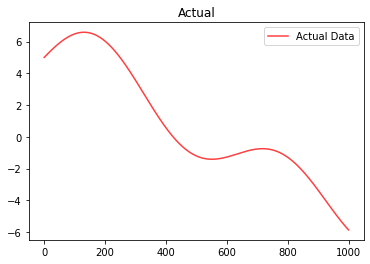

In [2]:
def function(t):
    """This is a linear combination of sine and cosine fucntions
    Implement your own function and play with the filter
    """
    return 2 * np.sin(t/100) + 5 * np.cos(t/350)

T = np.arange(0, 1000, 1.5)
values = [function(t) for t in T]
plt.plot(T, values, color="red", alpha=0.75, label="Actual Data")
plt.title("Actual")
plt.legend();

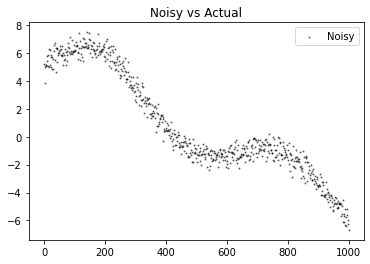

In [3]:
# Add noise to the measurement
def noise(val):
    # x = mu + y * std (Std Normal to Gaussian)
    return val + np.random.randn() * 0.5

values_noisy = [noise(val) for val in values]
plt.scatter(list(T), values_noisy, color="black", alpha=0.5, s=1, label="Noisy")
# plt.plot(T, values, color="red", alpha=0.75, label="Actual")
plt.title("Noisy vs Actual")
plt.legend();

# Task I
Filter the list `values_noisy` using a GH Filter and get an estimate close to the real Value. You can plot `values_filtered`, `values_noisy` and `values` to get to know how filtering works

In [4]:
"""Implement a GH_Filter Here"""
def GHFilter(noisy_values: list, g: float, h: float)->list:
    filtered_values = []

    # Adjust and play with G and H values. You can also plot filtered
    # data for various g and h values also

    g = g # 0.9
    h = h # 0.1
    dx = 0.005
    dt = 0.005
    # Implement the Algorithm here

    x_est = noisy_values[0]
    for z in noisy_values:
        # prediction step
        x_pred = x_est + (dx*dt)
        dx = dx

        # update step
        residual = z - x_pred
        dx = dx + h * (residual) / dt
        x_est = x_pred + g * residual
        filtered_values.append(x_est)

    return filtered_values

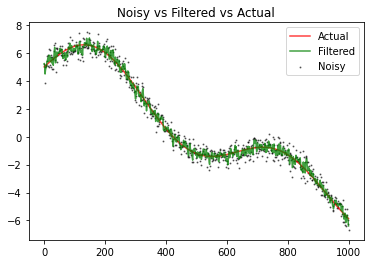

In [5]:
g = 0.5
h = 0.01
values_filtered = GHFilter(values_noisy, g, h)
plt.scatter(list(T), values_noisy, color="black", alpha=0.5, s=1, label="Noisy")
plt.plot(T, values, color="red", alpha=0.75, label="Actual")
plt.plot(T, values_filtered, color="green", alpha=0.75, label="Filtered")
plt.title("Noisy vs Filtered vs Actual")
plt.legend();

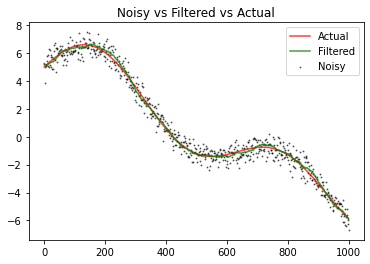

In [6]:
# here we are believeing just 5% on the sensor data and the rest on our predictions. So I think, above one is more preferable even though a bit noisy
g = 0.05
h = 0.005
values_filtered = GHFilter(values_noisy, g, h)
plt.scatter(list(T), values_noisy, color="black", alpha=0.5, s=1, label="Noisy")
plt.plot(T, values, color="red", alpha=0.75, label="Actual")
plt.plot(T, values_filtered, color="green", alpha=0.75, label="Filtered")
plt.title("Noisy vs Filtered vs Actual")
plt.legend();

# Task II: Track the drone
My drone is travelling in 3D. But my sensors are a mess. Use three GH Filters to filter `x, y, z` given the data

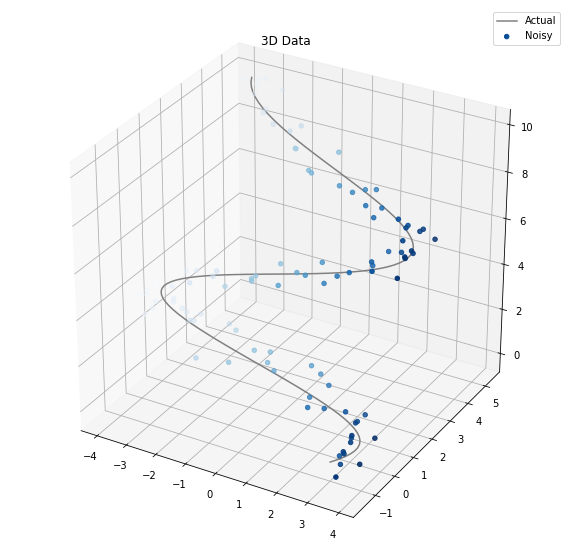

In [7]:
# Data Generation

T = np.arange(0, 10, 0.1)

# Actual data
z = T
x = 2 * np.sin(z) + 3 * np.cos(z)
y = 0.03 * z**2 + 0.0022 * z **3 - 0.3 **z

# Noisy
z_noisy = z + np.random.randn(z.shape[0]) * 0.1
x_noisy = x + np.random.randn(z.shape[0]) * 0.25
y_noisy = y + np.random.randn(z.shape[0]) * 0.5

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")
ax.plot3D(x, y, z, 'gray', label="Actual")
ax.scatter3D(x_noisy, y_noisy, z_noisy, c=x_noisy, cmap="Blues", label="Noisy")
plt.title("3D Data")
plt.legend();

In [8]:
# For a better visualisation, use plotly
# This is only for plotting. Dont panic if you dont understand this
# Refer to https://plotly.com/python/3d-line-plots/
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=x_noisy, y=y_noisy, z=z_noisy, name="Noisy",
    marker=dict(
        size=4,
        color=z,
        colorscale='Viridis',
    ),
    line=dict(
        color='blue',
        width=0.1
    )), go.Scatter3d(
    x=x, y=y, z=z, name="Actual",
    marker=dict(
        size=1,
        color=z,
        colorscale='Viridis',
    ),
    line=dict(
        color='red',
        width=5
    )
)])

fig.update_layout(
    width=800,
    height=700,
    autosize=False,
    scene=dict(
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=0,
                y=1.0707,
                z=1,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)
fig.show()

In [9]:
# Implement three GH Filters to obtain the filtered output
# g1 = 0.1
# h1 = 0.05
g1 = 0.05
h1 = 0.1

g2 = 0.06
h2 = 0.015

g3 = 0.05
h3 = 0.015

x_filtered = np.array(GHFilter(x_noisy, g1, h1))
y_filtered = np.array(GHFilter(y_noisy, g2, h2))
z_filtered = np.array(GHFilter(z_noisy, g3, h3))

# Store them in numpy arrays x_filtered, y_filtered, z_filtered

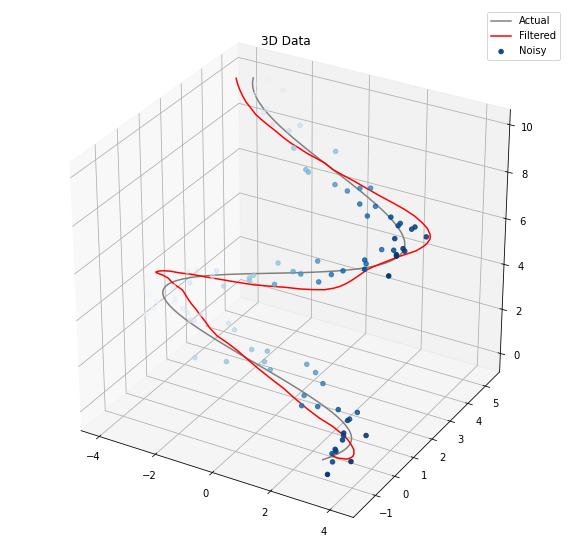

In [10]:
# Plot Results
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")
ax.plot3D(x, y, z, 'gray', label="Actual")
ax.plot3D(x_filtered, y_filtered, z_filtered, 'red', label="Filtered")
ax.scatter3D(x_noisy, y_noisy, z_noisy, c=x_noisy, cmap="Blues", label="Noisy")
plt.title("3D Data")
plt.legend();

In [11]:
# For a better visualisation, use plotly
# This is only for plotting. Dont panic if you dont understand this
# Refer to https://plotly.com/python/3d-line-plots/
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=x_noisy, y=y_noisy, z=z_noisy, name="Noisy",
    marker=dict(
        size=4,
        color=z,
        colorscale='Viridis',
    ),
    line=dict(
        color='blue',
        width=0.1
    )), go.Scatter3d(
    x=x, y=y, z=z, name="Actual",
    marker=dict(
        size=1,
        color=z,
        colorscale='Viridis',
    ),
    line=dict(
        color='grey',
        width=5
    )),
    
    go.Scatter3d(
    x=x_filtered, y=y_filtered, z=z_filtered, name="Filter",
    marker=dict(
        size=1,
        color=z,
        colorscale='Viridis',
    ),
    line=dict(
        color='red',
        width=5)
    )
    ])

fig.update_layout(
    width=800,
    height=700,
    autosize=False,
    scene=dict(
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=0,
                y=1.0707,
                z=1,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)
fig.show()